In [1]:
import os
os.chdir('../')
import pandas as pd

data = pd.read_csv('Datasets/analysis_data.csv')

In [100]:
y=data['monthly_spend']
X=data.drop(labels=['monthly_spend'],axis=1)

In [101]:
# Apply train test split
from sklearn.model_selection import train_test_split

X_train_raw,X_test_raw,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=2121)

In [102]:
X_train_raw.isna().sum()[X_train_raw.isna().sum()>0]

education_level           945
online_shopping_freq     1616
utility_payment_count     636
dtype: int64

In [103]:
X_train_raw

,customer_id,age,gender,marital_status,education_level,region,employment_status,owns_home,has_auto_loan,annual_income,...,tenure,card_type,num_transactions,avg_transaction_value,online_shopping_freq,reward_points_balance,travel_frequency,utility_payment_count,num_children,num_credit_cards
31692,59388931,45,male,married,graduate,northeast,employed,0,1,22878.997023,...,16,standard,6,47.834929,6.0,2425.848587,1,3.0,1,8
13685,85670564,66,female,married,NaN,west,self-employed,0,1,54257.699179,...,8,standard,10,45.612604,12.0,6000.718864,4,2.0,0,8
33229,82237918,73,male,married,high school,midwest,student,0,0,72347.453233,...,8,standard,11,45.618837,9.0,8463.942659,3,1.0,0,8
10458,17515077,22,male,single,graduate,south,self-employed,1,1,35364.087979,...,13,standard,7,23.629151,3.0,4313.029975,1,3.0,0,8
6515,61505492,68,female,married,bachelors,west,self-employed,1,1,127666.966419,...,17,gold,15,37.724942,12.0,12953.104107,9,9.0,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16135,81530732,18,male,single,bachelors,south,employed,0,0,15923.619280,...,10,standard,6,18.013316,4.0,2824.384765,0,3.0,1,8
36264,58068482,74,male,married,high school,midwest,unemployed,0,0,63077.318331,...,17,gold,5,65.710587,10.0,7392.999833,6,4.0,2,8
19595,86429171,75,male,married,bachelors,south,self-employed,1,0,41343.974019,...,18,standard,10,75.957729,12.0,5341.616800,2,6.0,1,8
39922,45518091,25,male,single,bachelors,midwest,student,0,1,32233.076133,...,17,standard,13,43.773134,3.0,4435.847895,0,4.0,1,8


Exploratory Data Anlysis

In [104]:
X_train_raw.columns

Index(['customer_id', 'age', 'gender', 'marital_status', 'education_level',
       'region', 'employment_status', 'owns_home', 'has_auto_loan',
       'annual_income', 'credit_score', 'credit_limit', 'tenure', 'card_type',
       'num_transactions', 'avg_transaction_value', 'online_shopping_freq',
       'reward_points_balance', 'travel_frequency', 'utility_payment_count',
       'num_children', 'num_credit_cards'],
      dtype='object')

<Axes: >

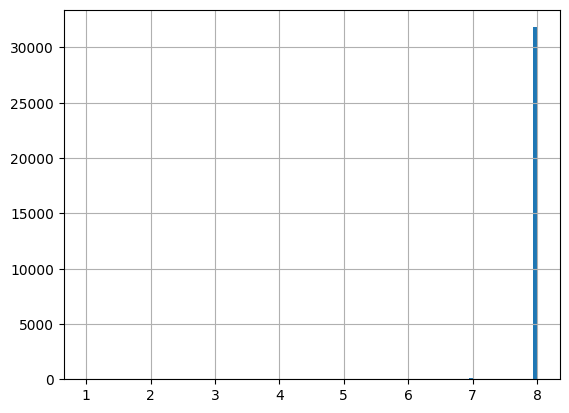

In [105]:
X_train_raw['num_credit_cards'].hist(bins=100)

In [106]:
X_train_raw.select_dtypes(['float','int']).corr()

,customer_id,age,owns_home,has_auto_loan,annual_income,credit_score,credit_limit,tenure,num_transactions,avg_transaction_value,online_shopping_freq,reward_points_balance,travel_frequency,utility_payment_count,num_children,num_credit_cards
customer_id,1.000000,-0.010494,0.006019,-0.001156,-0.004438,0.005154,-0.004084,-0.005731,-0.005669,-0.003241,-0.006876,-0.004836,-0.005837,-0.008669,-0.002994,0.000915
age,-0.010494,1.000000,0.006677,-0.000932,0.005933,-0.004926,0.005772,0.004940,0.004483,-0.012447,0.008905,0.006016,0.009251,-0.004077,0.043027,-0.003841
owns_home,0.006019,0.006677,1.000000,0.008668,-0.003884,-0.001014,-0.003314,0.001668,-0.003159,-0.006707,0.004801,-0.003752,-0.005280,-0.008219,-0.001913,0.001914
has_auto_loan,-0.001156,-0.000932,0.008668,1.000000,0.011044,0.004266,0.011275,-0.000159,0.007392,0.000163,0.006424,0.011054,0.004126,0.002570,0.002186,0.000002
annual_income,-0.004438,0.005933,-0.003884,0.011044,1.000000,-0.006807,0.980742,0.006404,0.832832,-0.000892,0.660448,0.998184,0.668261,0.488416,-0.003459,0.067345
credit_score,0.005154,-0.004926,-0.001014,0.004266,-0.006807,1.000000,0.082079,0.000505,-0.003808,0.001019,-0.006358,-0.006842,-0.006211,-0.006048,0.005155,0.011228
credit_limit,-0.004084,0.005772,-0.003314,0.011275,0.980742,0.082079,1.000000,0.005661,0.816659,-0.001490,0.647877,0.978933,0.655342,0.478919,-0.002078,0.066313
tenure,-0.005731,0.004940,0.001668,-0.000159,0.006404,0.000505,0.005661,1.000000,0.001808,0.001493,0.001103,0.006492,0.004432,0.006178,-0.000876,-0.001082
num_transactions,-0.005669,0.004483,-0.003159,0.007392,0.832832,-0.003808,0.816659,0.001808,1.000000,-0.005069,0.552041,0.830922,0.553958,0.408387,0.000801,0.049996
avg_transaction_value,-0.003241,-0.012447,-0.006707,0.000163,-0.000892,0.001019,-0.001490,0.001493,-0.005069,1.000000,-0.005995,-0.001261,-0.004807,0.000784,-0.001924,0.005249


One hot encoding

In [107]:
numeric_variables=X_train_raw.select_dtypes('number').columns
categorical_columns = X_train_raw.select_dtypes(include=['object', 'category']).columns.tolist()

In [123]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
    ],
    remainder='passthrough' # Keep numeric columns as they are
)
X_train_raw_encoded=preprocessor.fit_transform(X_train_raw)
feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))
numeric_cols = X_train_raw.select_dtypes(include=['number']).columns.tolist()
new_cols = feature_names + numeric_cols

X_train_processed=pd.DataFrame(X_train_raw_encoded, columns=new_cols)

In [109]:
X_train_processed.columns

Index(['gender_female', 'gender_male', 'marital_status_married',
       'marital_status_single', 'education_level_bachelors',
       'education_level_graduate', 'education_level_high school',
       'education_level_nan', 'region_midwest', 'region_northeast',
       'region_south', 'region_west', 'employment_status_employed',
       'employment_status_self-employed', 'employment_status_student',
       'employment_status_unemployed', 'card_type_gold', 'card_type_platinum',
       'card_type_standard', 'customer_id', 'age', 'owns_home',
       'has_auto_loan', 'annual_income', 'credit_score', 'credit_limit',
       'tenure', 'num_transactions', 'avg_transaction_value',
       'online_shopping_freq', 'reward_points_balance', 'travel_frequency',
       'utility_payment_count', 'num_children', 'num_credit_cards'],
      dtype='object')

In [110]:
X_train_processed.isna().sum()[X_train_processed.isna().sum()>0]

online_shopping_freq     1616
utility_payment_count     636
dtype: int64

In [111]:
# Assuming df_processed is the DataFrame from the previous step

# 1. Separate Training and Testing Data (Crucial step!)
# Although imputation is done first, we must prevent data leakage.
# Here, we'll impute the full processed df for simplicity, but in a real-world scenario,
# you would fit the imputer on X_train and then transform X_train and X_test.

# 2. Configure the Estimator (Random Forest)

# Random Forest often mimics PMM benefits:
# It handles skewed/non-normal data well and captures complex, non-linear relationships,
# which is effective for imputing highly correlated data.
# We set a simple estimator here.

estimator = RandomForestRegressor(n_estimators=10, random_state=2121)

# 3. Create the Iterative Imputer (MICE)
mice_imputer = IterativeImputer(
    estimator=estimator,
    max_iter=10,        # Number of imputation cycles (T)
    initial_strategy='mean', # Initial placeholder strategy
    random_state=2121
)

# 4. Fit the Imputer and Transform the Data
# The imputer automatically handles all columns, using each as a predictor for the others.
df_imputed_array = mice_imputer.fit_transform(X_train_processed)

# Convert the resulting NumPy array back to a Pandas DataFrame
df_imputed = pd.DataFrame(df_imputed_array, columns=X_train_processed.columns)

print("\nImputed Data (All Missing Values Filled):")
print(df_imputed)

# --- Post-Imputation Step: Verification ---
# You can check the missing counts
print("\nMissing values count after imputation:")
print(df_imputed.isnull().sum())


Imputed Data (All Missing Values Filled):
       gender_female  gender_male  marital_status_married  \
0                0.0          1.0                     1.0   
1                1.0          0.0                     1.0   
2                0.0          1.0                     1.0   
3                0.0          1.0                     0.0   
4                1.0          0.0                     1.0   
...              ...          ...                     ...   
31995            0.0          1.0                     0.0   
31996            0.0          1.0                     1.0   
31997            0.0          1.0                     1.0   
31998            0.0          1.0                     0.0   
31999            1.0          0.0                     1.0   

       marital_status_single  education_level_bachelors  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                   

In [112]:
df_imputed.isna().sum()[df_imputed.isna().sum()>0]

Series([], dtype: int64)

In [113]:
df_imputed['education_level_nan'].sum()

945.0

In [115]:
df_imputed

,gender_female,gender_male,marital_status_married,marital_status_single,education_level_bachelors,education_level_graduate,education_level_high school,education_level_nan,region_midwest,region_northeast,...,credit_limit,tenure,num_transactions,avg_transaction_value,online_shopping_freq,reward_points_balance,travel_frequency,utility_payment_count,num_children,num_credit_cards
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,5712.087036,16.0,6.0,47.834929,6.0,2425.848587,1.0,3.0,1.0,8.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,12087.116951,8.0,10.0,45.612604,12.0,6000.718864,4.0,2.0,0.0,8.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,14394.243191,8.0,11.0,45.618837,9.0,8463.942659,3.0,1.0,0.0,8.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,8073.728165,13.0,7.0,23.629151,3.0,4313.029975,1.0,3.0,0.0,8.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,30620.397765,17.0,15.0,37.724942,12.0,12953.104107,9.0,9.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3680.975449,10.0,6.0,18.013316,4.0,2824.384765,0.0,3.0,1.0,8.0
31996,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,15760.903586,17.0,5.0,65.710587,10.0,7392.999833,6.0,4.0,2.0,8.0
31997,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,9488.842966,18.0,10.0,75.957729,12.0,5341.616800,2.0,6.0,1.0,8.0
31998,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,7033.982066,17.0,13.0,43.773134,3.0,4435.847895,0.0,4.0,1.0,8.0


y_train

In [116]:
df

,customer_id,age,gender,marital_status,education_level,region,employment_status,owns_home,has_auto_loan,annual_income,...,tenure,card_type,num_transactions,avg_transaction_value,online_shopping_freq,reward_points_balance,travel_frequency,utility_payment_count,num_children,num_credit_cards
31692,59388931,45,male,married,graduate,northeast,employed,0,1,22878.997023,...,16,standard,6,47.834929,6.0,2425.848587,1,3.0,1,8
13685,85670564,66,female,married,NaN,west,self-employed,0,1,54257.699179,...,8,standard,10,45.612604,12.0,6000.718864,4,2.0,0,8
33229,82237918,73,male,married,high school,midwest,student,0,0,72347.453233,...,8,standard,11,45.618837,9.0,8463.942659,3,1.0,0,8
10458,17515077,22,male,single,graduate,south,self-employed,1,1,35364.087979,...,13,standard,7,23.629151,3.0,4313.029975,1,3.0,0,8
6515,61505492,68,female,married,bachelors,west,self-employed,1,1,127666.966419,...,17,gold,15,37.724942,12.0,12953.104107,9,9.0,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16135,81530732,18,male,single,bachelors,south,employed,0,0,15923.619280,...,10,standard,6,18.013316,4.0,2824.384765,0,3.0,1,8
36264,58068482,74,male,married,high school,midwest,unemployed,0,0,63077.318331,...,17,gold,5,65.710587,10.0,7392.999833,6,4.0,2,8
19595,86429171,75,male,married,bachelors,south,self-employed,1,0,41343.974019,...,18,standard,10,75.957729,12.0,5341.616800,2,6.0,1,8
39922,45518091,25,male,single,bachelors,midwest,student,0,1,32233.076133,...,17,standard,13,43.773134,3.0,4435.847895,0,4.0,1,8


In [117]:
# Lets try Stepwise
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

stfs = SequentialFeatureSelector(LinearRegression(),
          k_features='best',       
          forward=True,
          floating=True,           
          scoring='r2',
          cv=5)
stfs = stfs.fit(df_imputed, y_train)
pd.DataFrame(stfs.get_metric_dict()).T.loc[:,['feature_names','avg_score']].sort_values('avg_score', ascending = False)

,feature_names,avg_score
29,"(gender_female, marital_status_single, educati...",0.770703
27,"(gender_female, marital_status_single, educati...",0.770703
28,"(gender_female, marital_status_single, educati...",0.770703
30,"(gender_female, marital_status_single, educati...",0.770703
32,"(gender_female, gender_male, marital_status_si...",0.770703
31,"(gender_female, gender_male, marital_status_si...",0.770703
33,"(gender_female, gender_male, marital_status_ma...",0.770703
26,"(gender_female, marital_status_single, educati...",0.770697
25,"(gender_female, marital_status_single, educati...",0.770688
34,"(gender_female, gender_male, marital_status_ma...",0.770679


In [118]:
X_train=df_imputed[list(stfs.k_feature_names_)]

In [119]:
reg=LinearRegression().fit(X_train,y_train)

In [120]:
y_hat=reg.predict(X_train)

In [121]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_train,y_hat)


258.4918339464262

CHecking on testing data

In [124]:
# COnvert TEst Types

numeric_variables=X_test_raw.select_dtypes('number').columns
categorical_columns = X_test_raw.select_dtypes(include=['object', 'category']).columns.tolist()

X_test_raw_encoded=preprocessor.transform(X_test_raw)
feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))
numeric_cols = X_test_raw.select_dtypes(include=['number']).columns.tolist()
new_cols = feature_names + numeric_cols

X_test_processed=pd.DataFrame(X_test_raw_encoded, columns=new_cols)

# Transform mice

X_test_imputed_array = mice_imputer.transform(X_test_processed)
X_test= pd.DataFrame(X_test_imputed_array, columns=X_test_processed.columns)
X_test=X_test[list(stfs.k_feature_names_)]

In [125]:
y_hat_test=reg.predict(X_test)

root_mean_squared_error(y_test,y_hat_test)

252.98367804084918

Lets fit it to the scoring data

In [131]:
scoring_data=pd.read_csv('Datasets/scoring_data.csv')

numeric_variables=scoring_data.select_dtypes('number').columns
categorical_columns = scoring_data.select_dtypes(include=['object', 'category']).columns.tolist()

scoring_data_encoded=preprocessor.transform(scoring_data)
feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))
numeric_cols = scoring_data.select_dtypes(include=['number']).columns.tolist()
new_cols = feature_names + numeric_cols

scoring_data_processed=pd.DataFrame(scoring_data_encoded, columns=new_cols)

# Transform mice

scoring_data_imputed_array = mice_imputer.transform(scoring_data_processed)
scoring_data_pred= pd.DataFrame(scoring_data_imputed_array, columns=scoring_data_processed.columns)
scoring_data_pred=scoring_data_pred[list(stfs.k_feature_names_)]

In [ ]:
pred=reg.predict(scoring_data_pred)

In [133]:
scoring_data_pred

,gender_female,marital_status_single,education_level_bachelors,education_level_graduate,education_level_high school,education_level_nan,region_midwest,region_south,region_west,employment_status_self-employed,...,credit_limit,tenure,num_transactions,avg_transaction_value,online_shopping_freq,reward_points_balance,travel_frequency,utility_payment_count,num_children,num_credit_cards
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,6295.525826,17.0,6.0,32.444032,6.0,4360.785803,3.0,5.0,2.0,8.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,39234.812959,14.0,17.0,30.655429,18.0,18790.889746,7.0,7.0,3.0,8.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,10842.809736,1.0,9.0,36.063881,5.0,5625.669555,5.0,1.0,1.0,8.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,14833.580687,2.0,12.0,28.833727,11.0,6752.725039,1.0,4.0,3.0,8.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,21540.005936,7.0,15.0,12.361809,7.0,9154.342800,6.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,43168.419516,9.0,37.0,50.137444,15.0,23495.430799,4.0,8.0,2.0,8.0
9996,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,29497.676033,8.0,21.0,28.648005,13.0,14225.098422,6.0,3.0,3.0,8.0
9997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8611.789124,17.0,8.0,24.296211,9.0,4650.670228,3.0,1.0,1.0,8.0
9998,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,20479.381972,6.0,11.0,14.875617,13.0,9917.168868,3.0,4.0,0.0,8.0


In [134]:
submission_file = pd.DataFrame({'customer_id': scoring_data.customer_id, 'monthly_spend': pred})
submission_file.to_csv('Submissions/submission_file_5.csv',index = False)